<h2><b>Load The Data</b></h2>

<h3><b>Checking Versions</b></h3>

In [2]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
scipy: 1.7.1
numpy: 1.21.2
matplotlib: 3.5.0
pandas: 1.3.4
sklearn: 1.0.1


<h3><b>Import libraries</b></h3>

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

<h3><b>Load Dataset</b></h3>

In [3]:
df_zoo = pd.read_csv("../IA_ML/zoo.xls")
df_class = pd.read_csv("../IA_ML/class.xls")

<h3><b>Dimensions of Dataset</b></h3>

In [60]:
# shape
print(df_zoo.shape)

(101, 18)


<h2><b>Summarize the Dataset</b></h2>

<h3><b>Dimensions of Dataset</b></h3>

In [61]:
print(df_zoo.head(20))

   animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0     aardvark     1         0     0     1         0        0         1   
1     antelope     1         0     0     1         0        0         0   
2         bass     0         0     1     0         0        1         1   
3         bear     1         0     0     1         0        0         1   
4         boar     1         0     0     1         0        0         1   
5      buffalo     1         0     0     1         0        0         0   
6         calf     1         0     0     1         0        0         0   
7         carp     0         0     1     0         0        1         0   
8      catfish     0         0     1     0         0        1         1   
9         cavy     1         0     0     1         0        0         0   
10     cheetah     1         0     0     1         0        0         1   
11     chicken     0         1     1     0         1        0         0   
12        chub     0     

<h3><b>Statistical Summary</b></h3>

In [62]:
# descriptions
print(df_zoo.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

<h3><b>Class Distribution</b></h3>

In [63]:
# class distribution
labels = df_class['Class_Type'].to_list()
df_zoo["class_name"] = df_zoo["class_type"].apply(lambda x : labels[x-1])
print(df_zoo.groupby('class_name').size())

class_name
Amphibian        4
Bird            20
Bug              8
Fish            13
Invertebrate    10
Mammal          41
Reptile          5
dtype: int64


<h2><b>Data Visualization</b></h2>

<h3><b>Univariate Plots</b></h3>

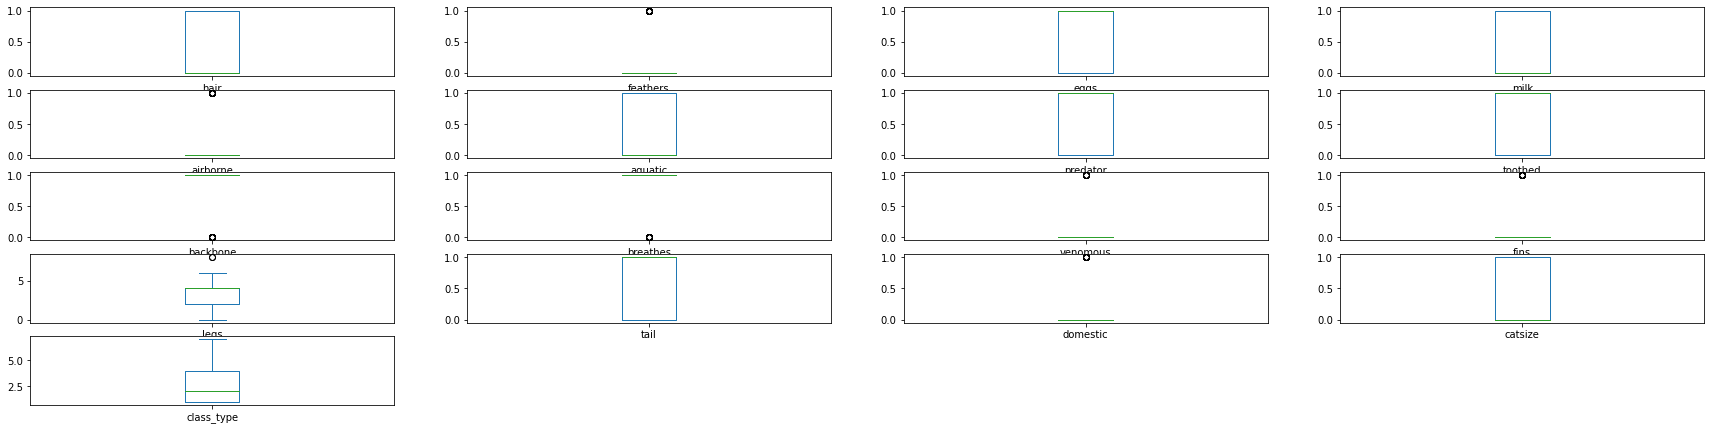

In [64]:
# box and whisker plots
df_zoo.plot(kind='box', subplots=True, layout=(20,4), sharex=False, sharey=False)
pyplot.rcParams["figure.figsize"]=30,30
pyplot.show()

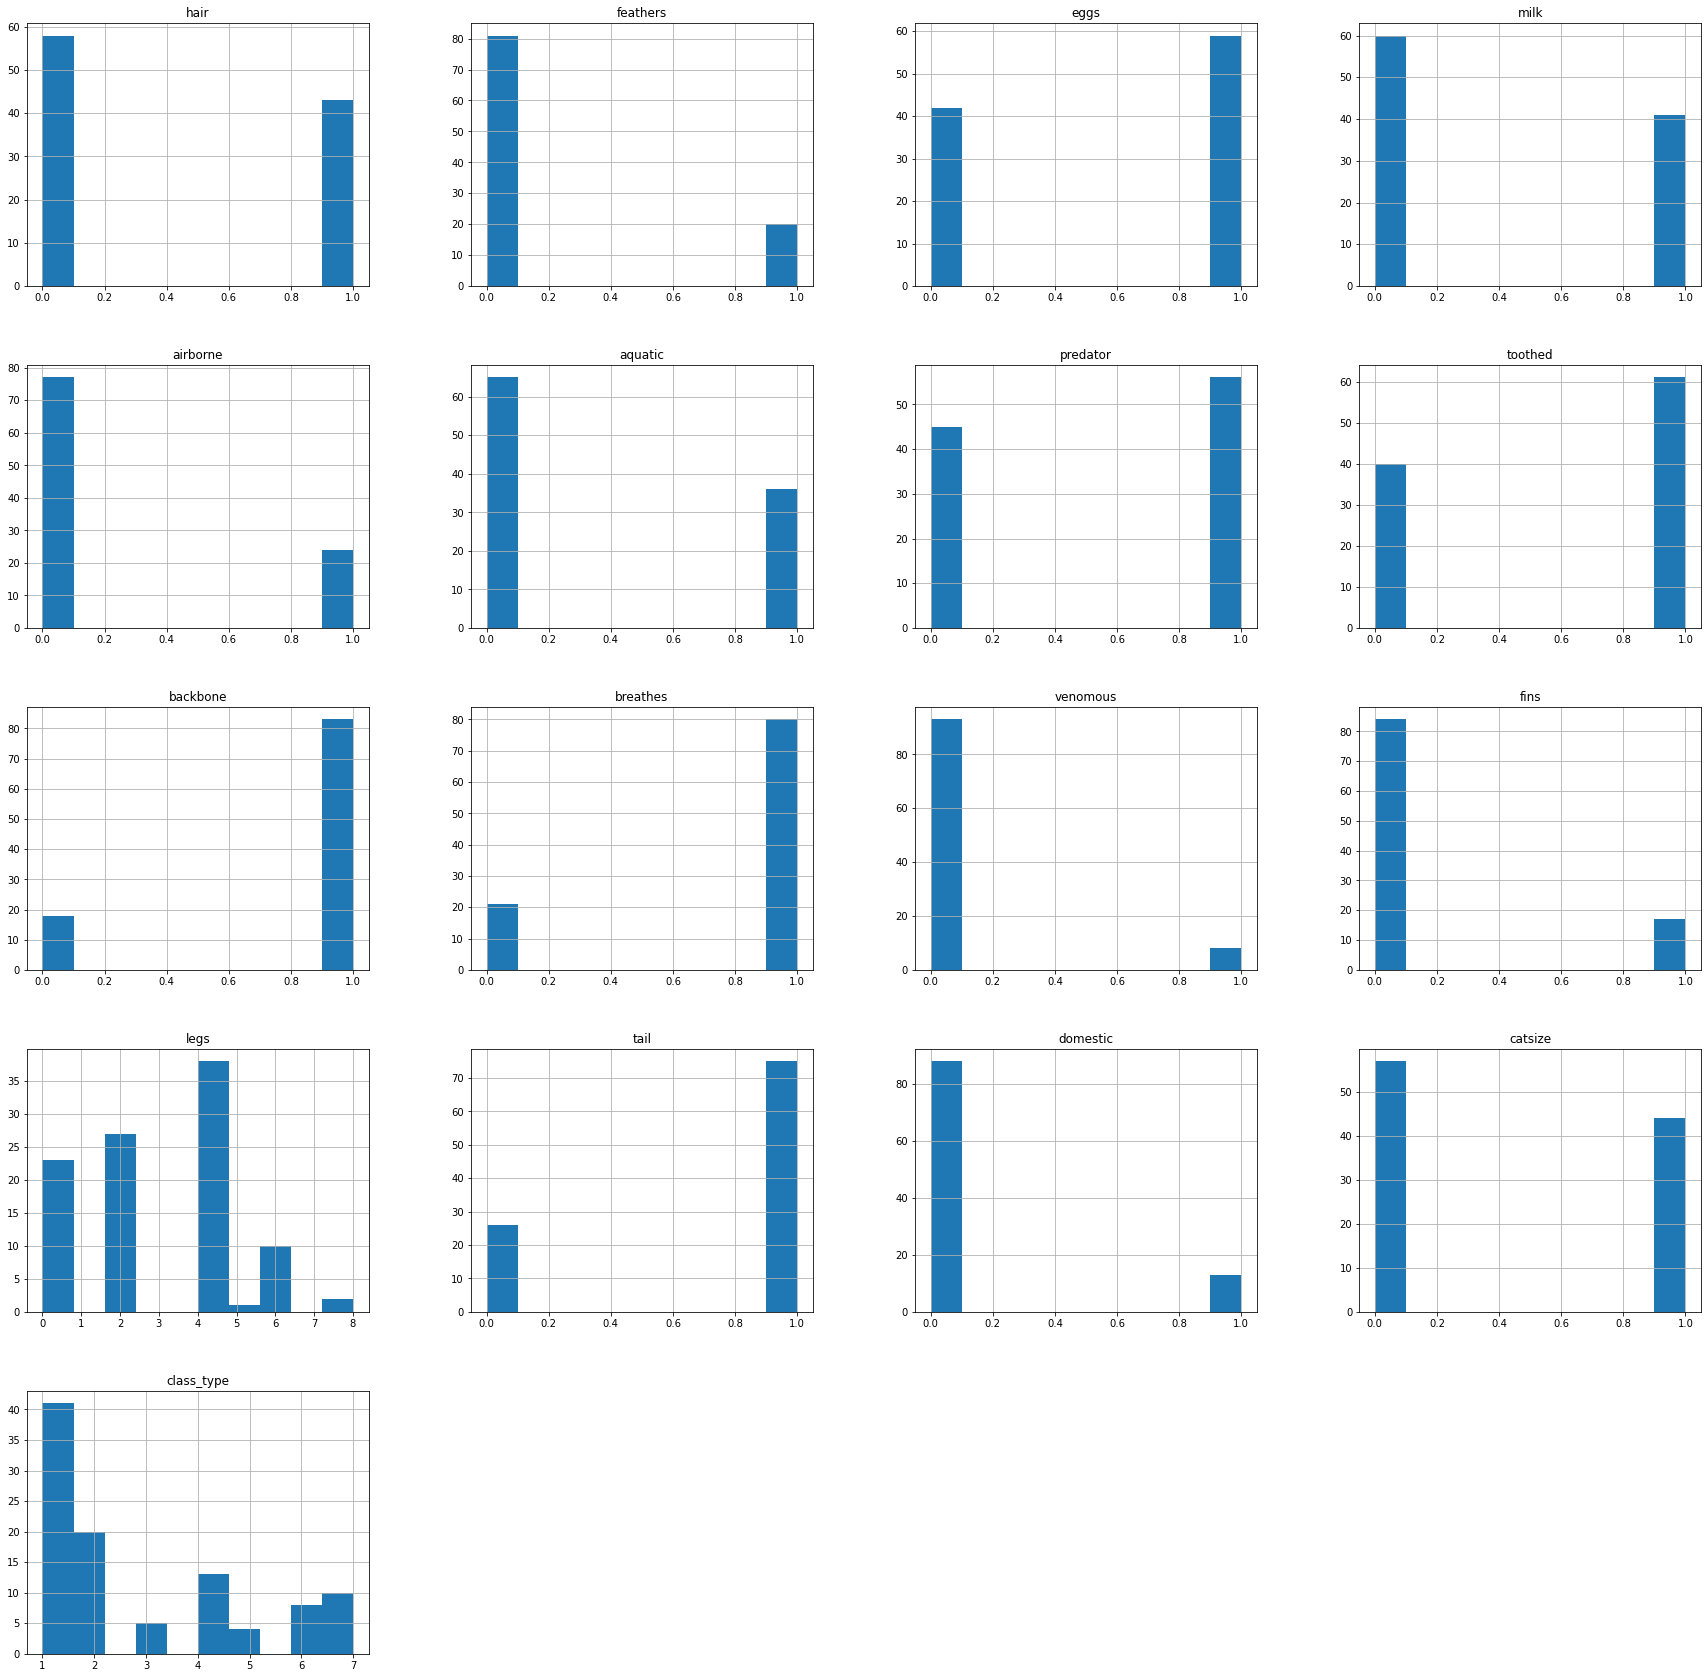

In [65]:
# histograms
df_zoo.hist()
pyplot.show()

<h3><b>Multivariate Plots</b></h3>

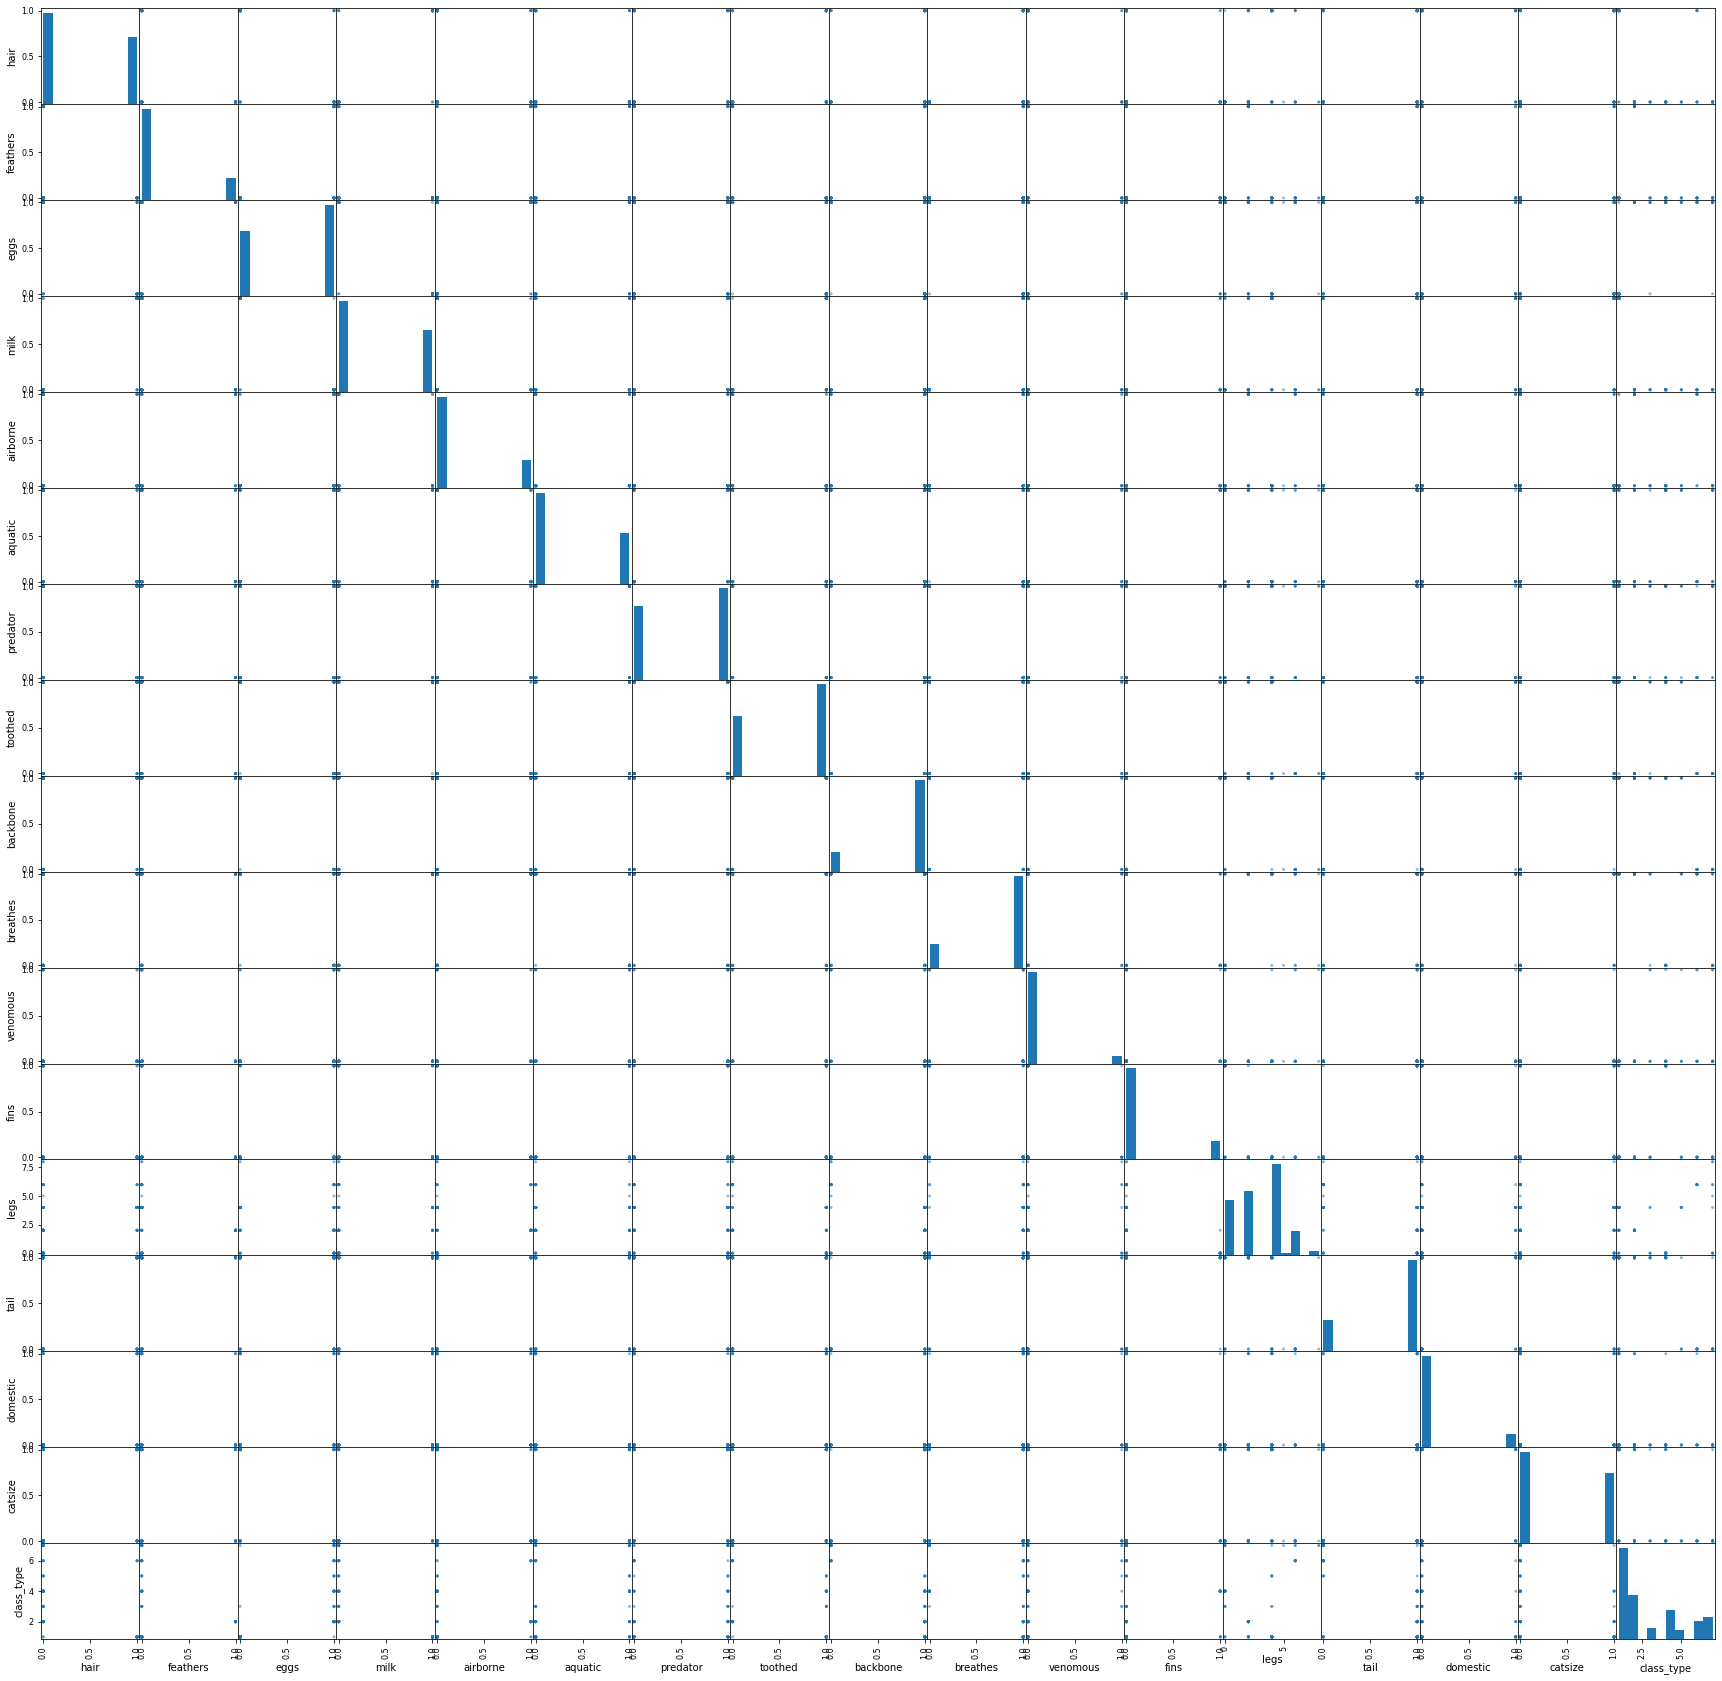

In [66]:
# scatter plot matrix
scatter_matrix(df_zoo)
pyplot.show()

<h2><b>Evaluate Some Algorithms</b></h2>

<h3><b>Create a Validation Dataset</b></h3>

In [67]:
# Split-out validation dataset
df_zoo = df_zoo.set_index(['animal_name'])
target = np.array(df_zoo.iloc[:,-1])
data = np.array(df_zoo.iloc[:,:-1])
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.30,stratify=target)

<h3><b>Build Models</b></h3>

In [69]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', svm.SVC(gamma='auto')))
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=3, random_state=20, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN: 0.857488 (0.017080)
CART: 0.956522 (0.035500)
SVM: 0.914251 (0.035541)


<h3><b>Select Best Model</b></h3>

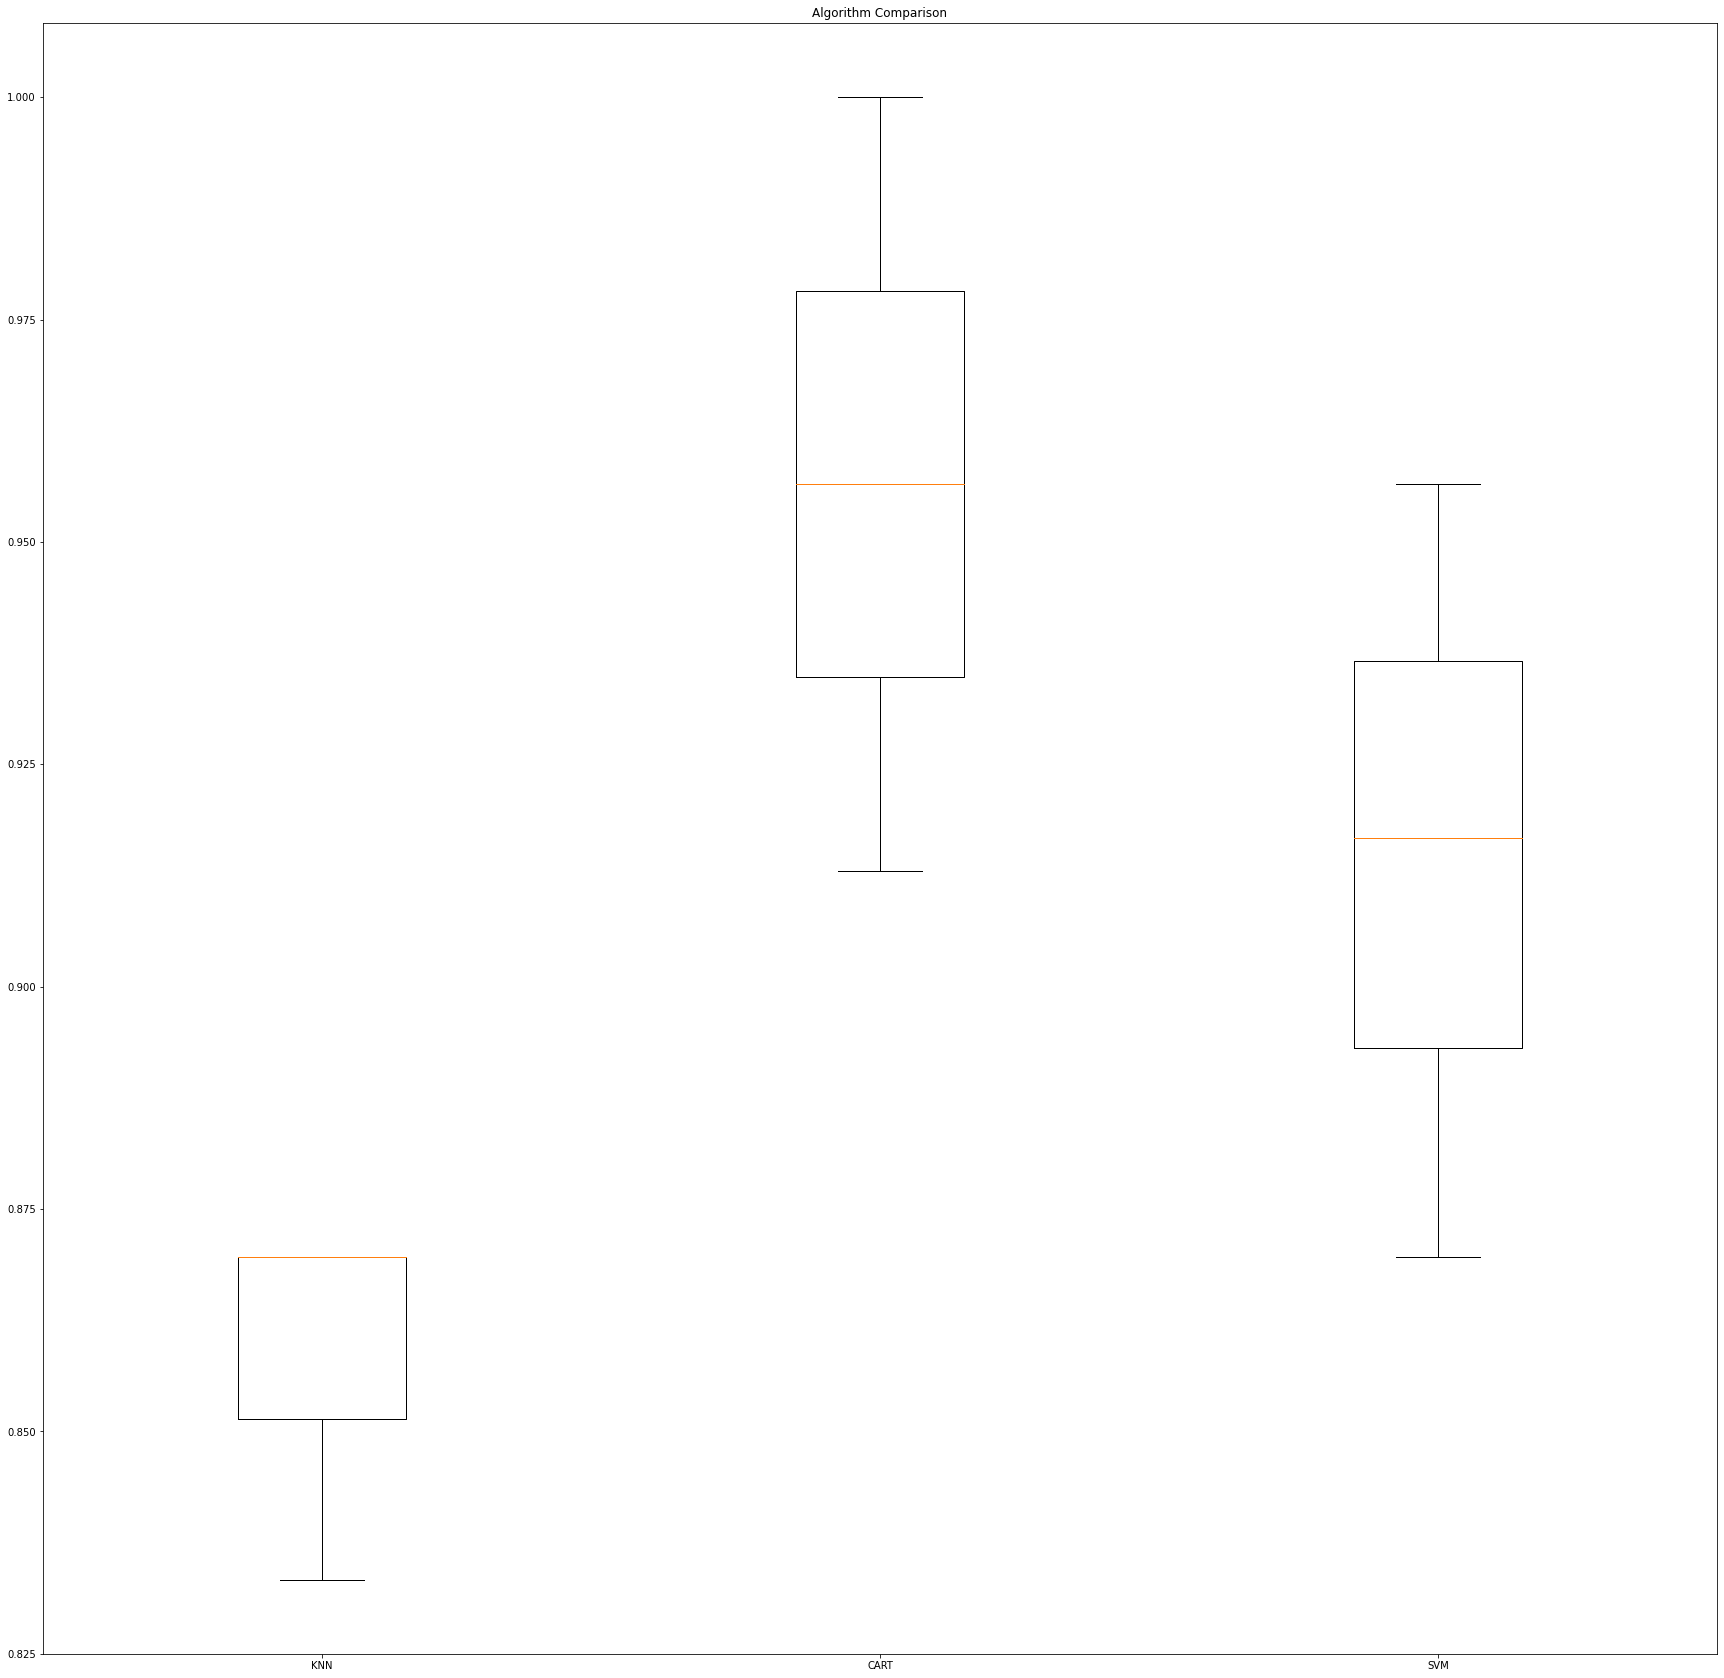

In [71]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

<h2><b>Make Predictions</b></h2>

<h3><b>Make Predictions</b></h3>

In [90]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

<h3><b>Evaluate Predictions</b></h3>

In [91]:
print("Accuracy: \n", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))

Accuracy: 
 0.967741935483871
Confusion matrix: 
 [[ 1  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0 13  0]
 [ 0  0  1  0  0  0  1]]
Classification Report: 
               precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         1
        Bird       1.00      1.00      1.00         6
         Bug       0.67      1.00      0.80         2
        Fish       1.00      1.00      1.00         4
Invertebrate       1.00      1.00      1.00         3
      Mammal       1.00      1.00      1.00        13
     Reptile       1.00      0.50      0.67         2

    accuracy                           0.97        31
   macro avg       0.95      0.93      0.92        31
weighted avg       0.98      0.97      0.97        31

